In [1]:
library(tidyverse)
library(magrittr)
library(purrr) 
library(glue) 
library(stringr) 

library(rvest) 
library(polite)

library(xml2) 

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




In [3]:
all_region_fire_incident <- read_html('https://www.fireandemergency.nz/incidents-and-news/incident-reports/')

In [4]:
north_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(6) .region .region__link') %>%
   html_attr('href') 
north_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=1&day=Monday"   
[2] "/incidents-and-news/incident-reports/incidents?region=1&day=Sunday"   
[3] "/incidents-and-news/incident-reports/incidents?region=1&day=Saturday" 
[4] "/incidents-and-news/incident-reports/incidents?region=1&day=Friday"   
[5] "/incidents-and-news/incident-reports/incidents?region=1&day=Thursday" 
[6] "/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday"
[7] "/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday"

In [5]:
central_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(7) .region .region__link') %>%
   html_attr('href') 
central_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=2&day=Monday"   
[2] "/incidents-and-news/incident-reports/incidents?region=2&day=Sunday"   
[3] "/incidents-and-news/incident-reports/incidents?region=2&day=Saturday" 
[4] "/incidents-and-news/incident-reports/incidents?region=2&day=Friday"   
[5] "/incidents-and-news/incident-reports/incidents?region=2&day=Thursday" 
[6] "/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday"
[7] "/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday"

In [6]:
south_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(8) .region .region__link') %>%
   html_attr('href') 
south_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=3&day=Monday"   
[2] "/incidents-and-news/incident-reports/incidents?region=3&day=Sunday"   
[3] "/incidents-and-news/incident-reports/incidents?region=3&day=Saturday" 
[4] "/incidents-and-news/incident-reports/incidents?region=3&day=Friday"   
[5] "/incidents-and-news/incident-reports/incidents?region=3&day=Thursday" 
[6] "/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday"
[7] "/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday"

In [7]:
all_region_href <- tibble(North = north_region_href, Central = central_region_href, South = south_region_href)
all_region_href

North,Central,South
<chr>,<chr>,<chr>
/incidents-and-news/incident-reports/incidents?region=1&day=Monday,/incidents-and-news/incident-reports/incidents?region=2&day=Monday,/incidents-and-news/incident-reports/incidents?region=3&day=Monday
/incidents-and-news/incident-reports/incidents?region=1&day=Sunday,/incidents-and-news/incident-reports/incidents?region=2&day=Sunday,/incidents-and-news/incident-reports/incidents?region=3&day=Sunday
/incidents-and-news/incident-reports/incidents?region=1&day=Saturday,/incidents-and-news/incident-reports/incidents?region=2&day=Saturday,/incidents-and-news/incident-reports/incidents?region=3&day=Saturday
/incidents-and-news/incident-reports/incidents?region=1&day=Friday,/incidents-and-news/incident-reports/incidents?region=2&day=Friday,/incidents-and-news/incident-reports/incidents?region=3&day=Friday
/incidents-and-news/incident-reports/incidents?region=1&day=Thursday,/incidents-and-news/incident-reports/incidents?region=2&day=Thursday,/incidents-and-news/incident-reports/incidents?region=3&day=Thursday
/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday
/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday


In [8]:
install.packages('xts')
library(xts)

Installing package into ‘/home/christopher/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last




In [9]:
region_incident_data <- function(href){
    
    region_data <- glue('https://www.fireandemergency.nz{href}#')%>%
                   read_html() %>%
                   html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                   html_text2()

    region_round_time <- strptime(region_data, "%d/%m/%Y %H:%M:%S")

    for(i in 1:length(region_round_time)){
        region_round_time[i] <- align.time(region_round_time[i], n=60*30
        )

    }
    
    return(region_round_time)
    
    }
    result <- region_incident_data("/incidents-and-news/incident-reports/incidents?region=1&day=Monday#")
    result
                  

 [1] "2022-10-10 01:00:00 NZDT" "2022-10-10 05:00:00 NZDT"
 [3] "2022-10-10 07:00:00 NZDT" "2022-10-10 07:30:00 NZDT"
 [5] "2022-10-10 07:30:00 NZDT" "2022-10-10 07:30:00 NZDT"
 [7] "2022-10-10 08:00:00 NZDT" "2022-10-10 08:00:00 NZDT"
 [9] "2022-10-10 08:00:00 NZDT" "2022-10-10 08:00:00 NZDT"
[11] "2022-10-10 08:30:00 NZDT" "2022-10-10 08:30:00 NZDT"
[13] "2022-10-10 08:30:00 NZDT" "2022-10-10 09:00:00 NZDT"
[15] "2022-10-10 09:00:00 NZDT" "2022-10-10 09:00:00 NZDT"
[17] "2022-10-10 09:30:00 NZDT" "2022-10-10 09:30:00 NZDT"
[19] "2022-10-10 09:30:00 NZDT" "2022-10-10 09:30:00 NZDT"
[21] "2022-10-10 10:00:00 NZDT" "2022-10-10 10:00:00 NZDT"
[23] "2022-10-10 10:00:00 NZDT" "2022-10-10 10:30:00 NZDT"
[25] "2022-10-10 10:30:00 NZDT" "2022-10-10 10:30:00 NZDT"
[27] "2022-10-10 10:30:00 NZDT" "2022-10-10 11:00:00 NZDT"
[29] "2022-10-10 11:00:00 NZDT" "2022-10-10 11:00:00 NZDT"
[31] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZDT"
[33] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZD

In [10]:
region_incident_data <- function(id, day){
    
    region_href <- glue('https://www.fireandemergency.nz/incidents-and-news/incident-reports/incidents?region={id}&day={day}#')%>%
                   read_html() 
    
    Incident <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(1) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()
    
    Date_and_Time <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()

    Date_and_Time <- strptime(Date_and_Time, "%d/%m/%Y %H:%M:%S")

    for(i in 1:length(Date_and_Time)){
        Date_and_Time[i] <- align.time(Date_and_Time[i], n=60*30
        )

    }
        
    Location <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(3) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()
    
    Duration <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(4) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()
    
    Station <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(5) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()
    
    Result <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(6) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()
    
    region_incident_table <- tibble(Incident_no = Incident, Date_and_Time = Date_and_Time, Location = Location, Duration = Duration, Station = Station, Result = Result)
    
    return(region_incident_table)
    
    }

format:
{region}_{day}_data

### North fire incident data (Monday to Sunday)

In [11]:
north_monday_data <- region_incident_data("1", "Monday")
north_monday_data

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3575491,2022-10-10 01:00:00,MAEROA HAMILTON CITY,00:00:00,Te Rapa,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575502,2022-10-10 05:00:00,KAIAUA HAURAKI DISTRICT,00:00:00,Kaiaua,9900: NON-FIRE EVENT: EXCL RESCUE/FALSE ALARM (MIN)
F3575529,2022-10-10 07:00:00,PAPAKURA AUCKLAND,00:08:09,Papakura,7100: FALSE ALARM (STRU)
F3575533,2022-10-10 07:30:00,TITIRANGI AUCKLAND,00:09:38,Titirangi,7100: FALSE ALARM (STRU)
F3575543,2022-10-10 07:30:00,PAPATOETOE AUCKLAND,00:00:00,Papatoetoe,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575544,2022-10-10 07:30:00,REMUERA AUCKLAND,00:00:00,Remuera,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575545,2022-10-10 08:00:00,PARNELL AUCKLAND,00:11:23,Parnell,7100: FALSE ALARM (STRU)
F3575546,2022-10-10 08:00:00,TE AWAMUTU WAIPA DISTRICT,00:00:00,Te Awamutu,1500: MISCELLANEOUS FIRE (STRU)
F3575550,2022-10-10 08:00:00,ONERAHI WHANGAREI DISTRICT,00:00:00,Onerahi,9900: NON-FIRE EVENT: EXCL RESCUE/FALSE ALARM (MIN)


In [12]:
north_tuesday_data <- region_incident_data("1", "Tuesday")

In [13]:
north_wednesday_data <- region_incident_data("1", "Wednesday")

In [14]:
north_thursday_data <- region_incident_data("1", "Thursday")

In [15]:
north_friday_data <- region_incident_data("1", "Friday")

In [16]:
north_saturday_data <- region_incident_data("1", "Saturday")

In [17]:
north_sunday_data <- region_incident_data("1", "Sunday")
north_sunday_data

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3575022,2022-10-09 00:30:00,AUCKLAND CENTRAL AUCKLAND,00:11:31,Auckland City,7100: FALSE ALARM (SPRNKLR)
F3575024,2022-10-09 01:00:00,WAINUI AUCKLAND,00:00:00,Silverdale,1200: MOBILE PROPERTY FIRE (MIN)
F3575026,2022-10-09 01:00:00,TE RAPA HAMILTON CITY,00:00:00,Te Rapa,7100: FALSE ALARM (SPRNKLR)
F3575030,2022-10-09 01:30:00,NUKUHAU TAUPO DISTRICT,03:21:28,Taupo,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575032,2022-10-09 01:30:00,MATAMATA MATAMATA-PIAKO DISTRICT,00:00:00,Matamata,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575033,2022-10-09 01:30:00,NORTHCOTE AUCKLAND,00:22:06,Takapuna,9900: NON-FIRE EVENT: EXCL RESCUE/FALSE ALARM (MIN)
F3575034,2022-10-09 01:30:00,WHAKATANE WHAKATANE DISTRICT,00:00:00,Whakatane,1500: MISCELLANEOUS FIRE (MIN)
F3575036,2022-10-09 02:00:00,WHAKATANE WHAKATANE DISTRICT,00:00:00,Whakatane,1500: MISCELLANEOUS FIRE (MIN)
F3575039,2022-10-09 02:00:00,HILLPARK AUCKLAND,00:15:20,Manurewa,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"


### Central fire incident data (Monday to Sunday)

In [18]:
central_monday_data <- region_incident_data("2", "Monday")

In [19]:
central_tuesday_data <- region_incident_data("2", "Tuesday")

In [20]:
central_wednesday_data <- region_incident_data("2", "Wednesday")

In [21]:
central_thursday_data <- region_incident_data("2", "Thursday")

In [22]:
central_friday_data <- region_incident_data("2", "Friday")

In [23]:
central_saturday_data <- region_incident_data("2", "Saturday")

In [24]:
central_sunday_data <- region_incident_data("2", "Sunday")

### South fire incident data (Monday to Sunday)

In [25]:
south_monday_data <- region_incident_data("3", "Monday")

In [26]:
south_tuesday_data <- region_incident_data("3", "Tuesday")

In [27]:
south_wednesday_data <- region_incident_data("3", "Wednesday")

In [28]:
south_thursday_data <- region_incident_data("3", "Thursday")

In [29]:
south_friday_data <- region_incident_data("3", "Friday")

In [30]:
south_saturday_data <- region_incident_data("3", "Saturday")

In [31]:
south_sunday_data <- region_incident_data("3", "Sunday")

## Merge all dataframe from Monday to Sunday into sngle one data frame

In [32]:
get_week_data <- function(region) {
    result_tibble <- tibble(
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    for(i in temp){
        result_tibble <- rbind(result_tibble, region_incident_data(region, i))
    }
    
    return(result_tibble)
}

the_tibble <- get_week_data("2")
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3575487,2022-10-10 00:30:00,OPUNAKE SOUTH TARANAKI DISTRICT,00:00:00,Opunake,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,2022-10-10 01:30:00,HIGHBURY PALMERSTON NORTH CITY,00:30:40,Palmerston North,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,2022-10-10 05:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,00:00:00,Inglewood,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,2022-10-10 05:30:00,LONGBURN PALMERSTON NORTH CITY,04:23:10,Palmerston North,
F3575511,2022-10-10 05:30:00,MAREWA NAPIER CITY,00:00:00,Napier,1200: MOBILE PROPERTY FIRE (STRU)
F3575513,2022-10-10 05:30:00,WHANGANUI EAST WHANGANUI DISTRICT,00:55:36,Whanganui,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,2022-10-10 06:00:00,MARAENUI NAPIER CITY,00:00:00,Napier,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,2022-10-10 06:30:00,HUTT CENTRAL LOWER HUTT CITY,00:18:15,Seaview,7100: FALSE ALARM (STRU)
F3575534,2022-10-10 07:30:00,TARADALE NAPIER CITY,00:20:52,Napier,7100: FALSE ALARM (STRU)


## Seperate date and time columns. Also adding the new column for the day of the week

In [33]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [34]:
# get_date <- function(datetime) {
#     the_time <- strsplit(datetime, split=" ")
#     return(the_time[[1]][2])
# }
# the_tibble

the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
F3575487,2022-10-10 00:30:00,OPUNAKE SOUTH TARANAKI DISTRICT,00:00:00,Opunake,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)",2022-10-10,00:30:00
F3575492,2022-10-10 01:30:00,HIGHBURY PALMERSTON NORTH CITY,00:30:40,Palmerston North,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,01:30:00
F3575505,2022-10-10 05:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,00:00:00,Inglewood,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)",2022-10-10,05:00:00
F3575508,2022-10-10 05:30:00,LONGBURN PALMERSTON NORTH CITY,04:23:10,Palmerston North,,2022-10-10,05:30:00
F3575511,2022-10-10 05:30:00,MAREWA NAPIER CITY,00:00:00,Napier,1200: MOBILE PROPERTY FIRE (STRU),2022-10-10,05:30:00
F3575513,2022-10-10 05:30:00,WHANGANUI EAST WHANGANUI DISTRICT,00:55:36,Whanganui,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,05:30:00
F3575519,2022-10-10 06:00:00,MARAENUI NAPIER CITY,00:00:00,Napier,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,06:00:00
F3575520,2022-10-10 06:30:00,HUTT CENTRAL LOWER HUTT CITY,00:18:15,Seaview,7100: FALSE ALARM (STRU),2022-10-10,06:30:00
F3575534,2022-10-10 07:30:00,TARADALE NAPIER CITY,00:20:52,Napier,7100: FALSE ALARM (STRU),2022-10-10,07:30:00


## Seperate the result code and the sesult description into 2 columns

In [35]:
get_result_code <- function(result){
    splitted_result <- strsplit(result, split=":")
    result_list <- vector(mode = "list", len = 0)
    for(i in splitted_result){
        # print(i[1])
        result_list<- append(result_list, i[1])
    }
    return(result_list)
}

get_result_desc <- function(result){
    splitted_result <- strsplit(result, split=":")
    desc_list <- vector(mode = "list", len = 0)
    for(i in splitted_result){
        desc = ""
        for(ind in seq_along(i)){

            if(ind != 1) {
                desc <- glue(desc,i[[ind]])
            }
        }

        desc_list <- append(desc_list, desc)
    }
    
    return(desc_list)
}


the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))
the_tibble




Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time,Result_code,Result_Description,Day
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<list>,<chr>,<ord>
F3575487,2022-10-10 00:30:00,OPUNAKE SOUTH TARANAKI DISTRICT,00:00:00,Opunake,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)",2022-10-10,00:30:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)",Mon
F3575492,2022-10-10 01:30:00,HIGHBURY PALMERSTON NORTH CITY,00:30:40,Palmerston North,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,01:30:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)",Mon
F3575505,2022-10-10 05:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,00:00:00,Inglewood,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)",2022-10-10,05:00:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)",Mon
F3575508,2022-10-10 05:30:00,LONGBURN PALMERSTON NORTH CITY,04:23:10,Palmerston North,,2022-10-10,05:30:00,NA,,Mon
F3575511,2022-10-10 05:30:00,MAREWA NAPIER CITY,00:00:00,Napier,1200: MOBILE PROPERTY FIRE (STRU),2022-10-10,05:30:00,1200,MOBILE PROPERTY FIRE (STRU),Mon
F3575513,2022-10-10 05:30:00,WHANGANUI EAST WHANGANUI DISTRICT,00:55:36,Whanganui,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,05:30:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)",Mon
F3575519,2022-10-10 06:00:00,MARAENUI NAPIER CITY,00:00:00,Napier,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,06:00:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)",Mon
F3575520,2022-10-10 06:30:00,HUTT CENTRAL LOWER HUTT CITY,00:18:15,Seaview,7100: FALSE ALARM (STRU),2022-10-10,06:30:00,7100,FALSE ALARM (STRU),Mon
F3575534,2022-10-10 07:30:00,TARADALE NAPIER CITY,00:20:52,Napier,7100: FALSE ALARM (STRU),2022-10-10,07:30:00,7100,FALSE ALARM (STRU),Mon


## Tidy up the data

#### dropping unecessary columns

In [36]:
the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,NA,
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


In [37]:
the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer))
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,NA,
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


## Finding out the missing data

In [38]:
library(visdat)

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.”


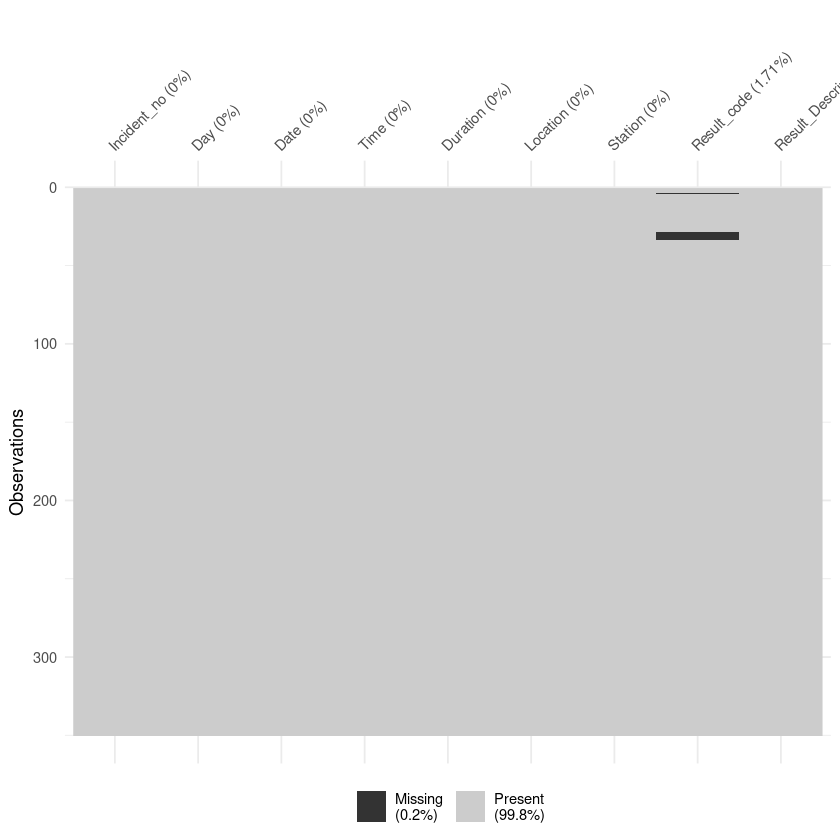

In [39]:
check_tibble <- the_tibble %>% vis_miss()
check_tibble

## Make empty string in Result Description to show NA insteas of an empty string

In [47]:
the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,NA,NA
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


## Automate the whole things
### the goal of this function is to have on function that will call any other related function which used to produce desired data

In [50]:
#this function returns a dataframe about the fire incidents called in a week( from Monday to Sunday)
#this function take region(characters) to indicate what region we want to get the data
#1 = North, 2 = Central, 3 = South
get_fire_incidents_data_in_a_week <- function(region) {
    the_tibble <- tibble(
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    for(i in temp){
        the_tibble <- rbind(the_tibble, region_incident_data(region, i))
    }

    the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))
    
    
    the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))


    the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)

    the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer))

    the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
    
    return(the_tibble)
}

north_region_data <- get_fire_incidents_data_in_a_week("1")
north_region_data
central_region_data <- get_fire_incidents_data_in_a_week("2")
central_region_data
south_region_data <- get_fire_incidents_data_in_a_week("3")
south_region_data

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575491,Mon,2022-10-10,01:00:00,00:00:00,MAEROA HAMILTON CITY,Te Rapa,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575502,Mon,2022-10-10,05:00:00,00:00:00,KAIAUA HAURAKI DISTRICT,Kaiaua,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (MIN)
F3575529,Mon,2022-10-10,07:00:00,00:08:09,PAPAKURA AUCKLAND,Papakura,7100,FALSE ALARM (STRU)
F3575533,Mon,2022-10-10,07:30:00,00:09:38,TITIRANGI AUCKLAND,Titirangi,7100,FALSE ALARM (STRU)
F3575543,Mon,2022-10-10,07:30:00,00:00:00,PAPATOETOE AUCKLAND,Papatoetoe,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575544,Mon,2022-10-10,07:30:00,00:00:00,REMUERA AUCKLAND,Remuera,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575545,Mon,2022-10-10,08:00:00,00:11:23,PARNELL AUCKLAND,Parnell,7100,FALSE ALARM (STRU)
F3575546,Mon,2022-10-10,08:00:00,00:00:00,TE AWAMUTU WAIPA DISTRICT,Te Awamutu,1500,MISCELLANEOUS FIRE (STRU)
F3575550,Mon,2022-10-10,08:00:00,00:00:00,ONERAHI WHANGAREI DISTRICT,Onerahi,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (MIN)


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,NA,NA
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575494,Mon,2022-10-10,02:00:00,00:21:18,BURNSIDE CHRISTCHURCH CITY,Ilam,7100,FALSE ALARM (STRU)
F3575495,Mon,2022-10-10,02:30:00,00:23:18,DUNEDIN CENTRAL DUNEDIN CITY,Dunedin,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (STRU)
F3575498,Mon,2022-10-10,04:00:00,00:00:00,PORTAGE MARLBOROUGH DISTRICT,Sounds,1500,MISCELLANEOUS FIRE (MIN)
F3575501,Mon,2022-10-10,04:30:00,00:16:53,CHRISTCHURCH CENTRAL CHRISTCHURCH CITY,Christchurch City,7100,FALSE ALARM (SPRNKLR)
F3575503,Mon,2022-10-10,05:00:00,00:27:34,ALLENTON ASHBURTON DISTRICT,Ashburton,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575517,Mon,2022-10-10,06:00:00,00:14:36,MAIREHAU CHRISTCHURCH CITY,Christchurch City,1500,MISCELLANEOUS FIRE (MIN)
F3575537,Mon,2022-10-10,07:30:00,00:00:00,NORTH DUNEDIN DUNEDIN CITY,Dunedin,1400,"CHEMICAL, FLAMMABLE LIQUID, GAS FIRE (HAZGAS)"
F3575539,Mon,2022-10-10,07:30:00,00:18:13,HARGEST INVERCARGILL CITY,Invercargill,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (MIN)
F3575547,Mon,2022-10-10,08:00:00,00:00:00,HORNBY SOUTH CHRISTCHURCH CITY,Wigram,1500,MISCELLANEOUS FIRE (STRU)
